In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

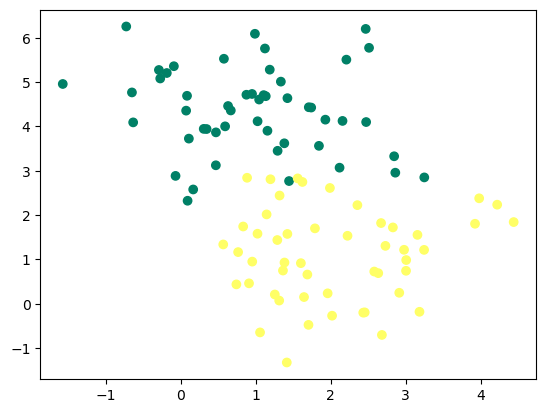

In [11]:
#création d'un dataset
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))
plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

In [12]:
#fonction pour initialiser le biais et les paramètres w
def init(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return (W,b)

In [13]:
#fonction qui sert à calculer le modèle linéaire et à appliquer la fonction d'activation (sigmoïde)
def modele(X,W,b):
    Z=X.dot(W)+b
    A=1/(1+np.exp(-Z))
    return A

In [14]:
#fonction pour calculer les erreurs du modèle
def fonction_cout(A,y):
    L=-1/len(y)*np.sum(y*np.log(A)+(1-y)*np.log(1-A))
    return L

In [15]:
#fonction pour calculer les gradients
def gradient(A,X,y):
    dw = 1/len(y)*np.dot(X.T, A - y)
    db = 1/len(y)*np.sum(A - y)
    return (dw,db)

In [16]:
#fonction pour modifier les paramètres w et le bias b
def update(dw,db,W,b,alpha):
    W=W-alpha*dw
    b=b-alpha*db
    return (W,b)

In [17]:
#fonction pour faire une prédiction à partir des données d'un neurone entrainé
def prediction(X,W,b):
    A=modele(X,W,b)
    return A>=0.5

In [25]:
#fonction qui simule l'entrainement du neurone
def neurone(X,y,alpha=0.1,n=100):
    #initialisation de W et b
    W,b=init(X)
    #tableau pour stocker les erreurs
    cout=[]
    for i in range(n):
        A=modele(X,W,b)
        L=fonction_cout(A,y)
        cout.append(L)
        dw,db=gradient(A,X,y)
        W,b=update(dw,db,W,b,alpha)
        
    y_pred = prediction(X,W,b)
    print(accuracy_score(y,y_pred))
    
    #pour afficher les erreurs
    plt.plot(cout)
    plt.show()
    
    return W,b

0.92


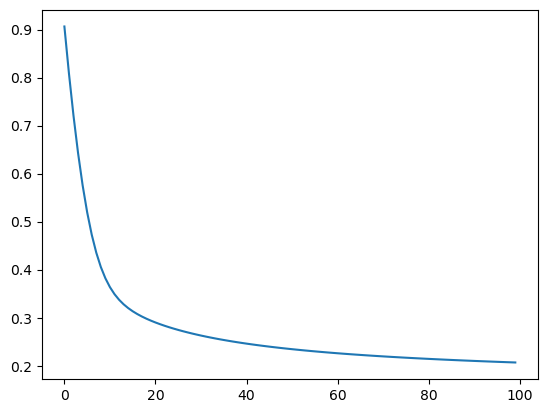

In [26]:
W,b = neurone(X,y)

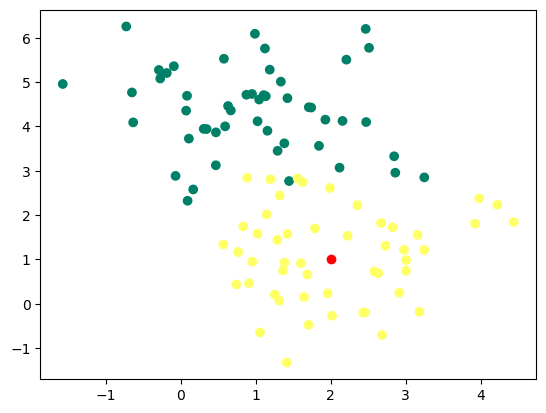

array([ True])

In [27]:
#on tente une prédiction sur une donnée en (2,1)
donnee=np.array([2,1])
plt.scatter(X[:,0],X[:,1],c=y,cmap="summer")
plt.scatter(donnee[0],donnee[1],c="r")
plt.show()
prediction(donnee,W,b)

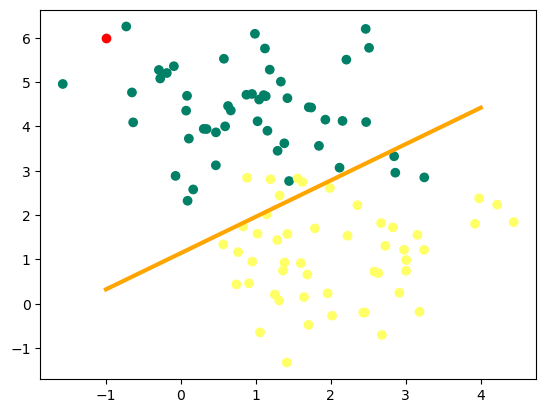

array([False])

In [29]:
#même chose avec (-1,6)
donnee=np.array([-1,6])

x0 = np.linspace(-1,4,100)
x1 = ( -W[0] * x0 - b )/W[1]

plt.scatter(X[:,0],X[:,1],c=y,cmap="summer")
plt.scatter(donnee[0],donnee[1],c="r")
plt.plot(x0,x1,c='orange',lw=3)
plt.show()
prediction(donnee,W,b)